In [1]:
!pip install spacy

In [2]:
!python -m spacy download pl_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import pandas as pd
import json
import requests
import spacy
import matplotlib.pyplot as plt

In [18]:
nlp = spacy.load("pl_core_news_lg")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [53]:
MAIN_DATA = pd.read_csv("/content/dane3.csv")

In [54]:
df_dane = MAIN_DATA.copy()

In [10]:
df_dane

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,organizations
0,NaN,Mon Jul 05 07:58:09 +0000 2021,NaN,NaN,NaN,1,1411957559712432128,ciahol,1.411813e+18,1.313318e+09,...,5053,9,Jastrzębie Zdrój woj śląskie,Malina Wąsowska,NieOddac,24391,NaN,https://tumalina.pl/,False,None
1,NaN,Mon Jul 05 08:21:28 +0000 2021,NaN,NaN,NaN,0,1411963424221941763,RyszardWojcik,1.411944e+18,5.448980e+08,...,1480,182,Polska,meteoprognoza.pl🇵🇱,MeteoprognozaPL,200993,NaN,http://www.meteoprognoza.pl,False,None
2,NaN,Mon Jul 05 12:50:04 +0000 2021,NaN,NaN,NaN,1,1412031023588708352,Kwiatkow_Lipska,1.412019e+18,1.270771e+18,...,1861,9,NaN,Jola.Iza Lubelanka z Podkarpacia # Unia to My 🇪🇺,jolaiza29,24775,NaN,NaN,False,None
3,NaN,Mon Jul 05 06:33:46 +0000 2021,opad Polska pogoda klimat,https://twitter.com/PogodaMeteo/status/1411936...,NaN,5,1411936323779371013,NaN,NaN,NaN,...,364,49,Polska,Meteomodel ❄️ ❄️ ❄️,PogodaMeteo,70608,NaN,https://meteomodel.pl/,False,None
4,NaN,Mon Jul 05 11:13:20 +0000 2021,NaN,NaN,NaN,0,1412006678275448834,Energetyka_24,1.412006e+18,3.821303e+09,...,936,20,opolskie,WIESLAW ROBERT ROK,WESLEYROBERTART,54644,NaN,http://www.opolskie.upr.org.pl,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,NaN,Wed Jun 30 08:10:33 +0000 2021,fitczerwiec fitlipiec,https://twitter.com/healthy_bubble_/status/141...,NaN,23,1410148739109601281,NaN,NaN,NaN,...,253,0,she/her !!!,𝘢𝘷𝘰𝘬𝘢𝘥𝘰✨,healthy_bubble_,1044,NaN,https://sunflowergirl01.carrd.co/,False,None
1946,NaN,Wed Jun 30 08:33:10 +0000 2021,NaN,NaN,NaN,0,1410154429383417859,NaN,NaN,NaN,...,899,42,Poland,Extinction Rebellion Polska,XRPolska,5733,NaN,http://xr.org.pl/,False,None
1947,NaN,Wed Jun 30 07:17:38 +0000 2021,NaN,NaN,NaN,0,1410135423813308416,NaN,NaN,NaN,...,828,69,Warsaw,Agnes Saoirse Byrne,MeSaoirse,256513,NaN,http://www.instagram.com/mesaoirse/,False,None
1948,NaN,Wed Jun 30 09:37:47 +0000 2021,klimat metan alternatywnezrodlaenergii geologia,NaN,https://naukawpolsce.pap.pl/aktualnosci/news%2...,0,1410170690989400070,NaN,NaN,NaN,...,702,135,Polska,Nauka w Polsce,naukawpolsce,5670,NaN,http://naukawpolsce.pap.pl,False,None


In [50]:
#1.1 Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
df_dane["created_at"] = [elem.replace("Mon", "Poniedziałek").replace("Tue", "Wtorek").replace("Wed", "Środa").replace("Thu", "Czwartek").replace("Fri", "Piątek"). replace("Sat", "Sobota").replace("Sun", "Niedziela") for elem in df_dane["created_at"]]

In [48]:
#1.2 Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
df_dane["created_at"] = [elem.replace("Jun", "06").replace("Jul", "07") for elem in df_dane["created_at"]]

In [10]:
for elem in df_dane["created_at"]:
  print(elem)

Poniedziałek 07 05 07:58:09 +0000 2021
Poniedziałek 07 05 08:21:28 +0000 2021
Poniedziałek 07 05 12:50:04 +0000 2021
Poniedziałek 07 05 06:33:46 +0000 2021
Poniedziałek 07 05 11:13:20 +0000 2021
Poniedziałek 07 05 07:12:28 +0000 2021
Poniedziałek 07 05 08:25:33 +0000 2021
Poniedziałek 07 05 12:26:06 +0000 2021
Poniedziałek 07 05 08:47:38 +0000 2021
Poniedziałek 07 05 10:31:27 +0000 2021
Poniedziałek 07 05 10:22:54 +0000 2021
Poniedziałek 07 05 12:44:25 +0000 2021
Poniedziałek 07 05 13:06:42 +0000 2021
Poniedziałek 07 05 08:40:08 +0000 2021
Poniedziałek 07 05 09:11:39 +0000 2021
Poniedziałek 07 05 12:52:45 +0000 2021
Poniedziałek 07 05 11:59:08 +0000 2021
Poniedziałek 07 05 10:04:13 +0000 2021
Poniedziałek 07 05 08:35:48 +0000 2021
Poniedziałek 07 05 11:12:31 +0000 2021
Poniedziałek 07 05 08:03:13 +0000 2021
Poniedziałek 07 05 12:51:14 +0000 2021
Poniedziałek 07 05 08:15:34 +0000 2021
Poniedziałek 07 05 06:17:30 +0000 2021
Poniedziałek 07 05 10:31:23 +0000 2021
Poniedziałek 07 05 09:59:

In [77]:
#1.3 Pobierz wszystkie linki do tweetów i przekaż je do listy.
tweety_linki = df_dane["tweet_url"].tolist()
print(tweety_linki)

['https://twitter.com/NieOddac/status/1411957559712432128', 'https://twitter.com/MeteoprognozaPL/status/1411963424221941763', 'https://twitter.com/jolaiza29/status/1412031023588708352', 'https://twitter.com/PogodaMeteo/status/1411936323779371013', 'https://twitter.com/WESLEYROBERTART/status/1412006678275448834', 'https://twitter.com/SDGsbot/status/1411946061564985349', 'https://twitter.com/iSokolkaeu/status/1411964452921122816', 'https://twitter.com/Squabercom/status/1412024990497656836', 'https://twitter.com/SolskaAda/status/1411970011992891394', 'https://twitter.com/PogodaMeteo/status/1411996139604357122', 'https://twitter.com/TestateTornado/status/1411993985946734595', 'https://twitter.com/PerfectDilemma2/status/1412029598758588419', 'https://twitter.com/tytus_de_zoo_/status/1412035207608348675', 'https://twitter.com/PogodaMeteo/status/1411968124627324930', 'https://twitter.com/TerazSrodowisko/status/1411976056249237505', 'https://twitter.com/RafalDudkiewic1/status/14120316949374648

In [79]:
#1.4 Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
intweety_linki = df_dane["urls"].dropna().tolist()
print(intweety_linki)

['https://blog.squaber.com/2021/07/niewidzialna-reka-hossy-magazyn-bilans-lipiec-2021/', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://www.teraz-srodowisko.pl/aktualnosci/holandia-elektrownie-weglowe-10552.html', 'http://www.portalmorski.pl/inne/48771-przelewanie-sie-fal-przez-nabrzeza-bedzie-coraz-czestsze-rowniez-w-polsce', 'https://en.wikipedia.org/wiki/Svante_Arrhenius#:~:text=Arrhenius%2C%20in,greenhouse%20effect', 'https://blog.meteomodel.pl/temperatura-baltyku/', 'https://twitter.com/EURO2024/status/1410938319568084993', 'https://weszlo.com/2021/07/05/michal-pazdan-wywiad/', 'https://plus.gloswielkopolski.pl/dlaczego-zawalil-sie-dach-nowej-hali-sportowej-w-poznaniu-ujawniamy-kulisy-jej-budowy/ar/c1-15691815', 'https://odpowiedzialnybiznes.pl/aktualno%C5%9Bci/europejczycy-uwazaja-zmiane-klimatu-za-najpowazniejszy-problem-przed-ktorym-stoi-swiat/', 'https://twitter.com/YadeaGlobal/status/1385911399927275521',

In [61]:
#1.5 Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
obrazki_link = df_dane["media"].dropna().tolist()
print(obrazki_link)

['https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/Squabercom/status/1412024990497656836/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996139604357122/photo/1', 'https://twitter.com/PogodaMeteo/status/1411968124627324930/photo/1', 'https://twitter.com/PortalMorski/status/1411989284148723712/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996122399358981/photo/1', 'https://twitter.com/FOB_Poland/status/1412008431553290240/photo/1', 'https://twitter.com/PogodaMeteo/status/1411944377715417089/photo/1', 'https://twitter.com/EnamoradaArt/status/1412016277586067456/video/1', 'https://twitter.com/FOB_Poland/status/1412007587890053121/photo/1', 'https://twitter.com/MaciejWolnosc/status/1411997844672815106/photo/1', 'https://twitter.com/PogodaMeteo/status/1412013425824256006/photo/1', 'https://twitter.com/Muzeum_Widzewa/status/1411961774941818886/photo/1', 'https://twitte

In [60]:
#1.6 Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords
def remove_stopwords(text):
  doc = nlp(text)
  filtered_tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(filtered_tokens)

df_dane['text_without_stopwords'] = df_dane['text'].apply(remove_stopwords)
print(df_dane[['text', 'text_without_stopwords']])

                                                   text  \
0     @ciahol @Robert06270082 @Renata_Grochal @MacBo...   
1     @RyszardWojcik @Roberte36015396 @SzczesniakA @...   
2     @Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...   
3     AutoTweet: Dobowa suma #opad w #Polska w dniu ...   
4     @Energetyka_24 Człowiek ma gigantyczny wpływ n...   
...                                                 ...   
1945  dzisiaj na śniadanie tost francuski i czarna k...   
1946  W Kanadzie było wczoraj bardzo gorąco. Prawie ...   
1947  Ten moment kiedy nawet Terlecki mówi że w PiS ...   
1948  Hydraty metanu to alternatywne źródło energii,...   
1949  Ta piosenka jest tak 100% Lukowa, że jestem w ...   

                                 text_without_stopwords  
0     @ciahol @Robert06270082 @Renata_Grochal @MacBo...  
1     @RyszardWojcik @Roberte36015396 @SzczesniakA @...  
2     @Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...  
3     AutoTweet Dobowa suma opad Polska dniu 2021 07...  
4

In [59]:
df_dane.keys()

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'persons', 'places', 'organizations'],
      dtype='object')

In [64]:
#2.1 Wypisz top5 tweetów z największa liczbą polubień.
df_dane.sort_values(by=["favorite_count"], ascending=[False]).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons,places,organizations,text_without_stopwords
1281,NaN,Fri Jul 02 16:56:52 +0000 2021,NaN,NaN,NaN,5634,1411005965428789252,NaN,NaN,NaN,...,Max. 🥷🏻,999nob0dy,8108,NaN,http://twitch.tv/nob0dyGuy,False,[Max],None,None,Imagine pójść pierwsza randkę dziewczyna wiejs...
1074,NaN,Sat Jul 03 05:22:26 +0000 2021,NaN,NaN,https://www.bloomberg.com/news/articles/2021-0...,467,1411193596347310089,NaN,NaN,NaN,...,Tomasz Wróblewski,tomaawroblewski,10769,NaN,http://wei.org.pl,False,[Tomasz Wróblewski],None,None,Kalifornia kroliczkiem katastrofy klimatyzmu B...
178,NaN,Sun Jul 04 16:58:26 +0000 2021,NaN,NaN,NaN,215,1411731136833888259,yahabibtii,1.411712e+18,817643346.0,...,Balaclava 🍷,Annie_6167,55984,NaN,NaN,False,None,None,None,@yahabibtii Pracuje kawiarni nieraz jacyś stal...
935,NaN,Sat Jul 03 10:40:01 +0000 2021,kryzysklimatyczny,NaN,NaN,131,1411273519875465216,NaN,NaN,NaN,...,Katarzyna Lubnauer,KLubnauer,50616,NaN,http://nowoczesna.org,True,[Katarzyna Lubnauer],"[Lodz, Poland]",None,Ciekawe upały pożary chłodnej Kanadzie przekon...
1472,NaN,Thu Jul 01 17:55:14 +0000 2021,NaN,https://twitter.com/lonelyhazza/status/1410658...,NaN,99,1410658266464534540,NaN,NaN,NaN,...,mercia²⁸,lonellyharryy,75796,NaN,http://no.stunts.xn--mta353bmmu,False,[mercia²⁸],None,None,myślę klimat https://t.co/uIXNcsyCTW


In [65]:
#2.2 Wypisz top5 tweetów z największa liczbą retweetów.
df_dane.sort_values(by=["retweet_count"], ascending=[False]).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons,places,organizations,text_without_stopwords
666,NaN,Sat Jul 03 19:46:21 +0000 2021,NaN,NaN,NaN,0,1411411006371270662,NaN,NaN,NaN,...,Taja,tajafen,2597,NaN,NaN,False,None,None,None,Imagine pójść pierwsza randkę dziewczyna wiejs...
442,NaN,Sun Jul 04 07:08:50 +0000 2021,NaN,NaN,NaN,0,1411582758170894337,NaN,NaN,NaN,...,maja,_jamajka_007,733,NaN,NaN,False,None,None,None,Imagine pójść pierwsza randkę dziewczyna wiejs...
432,NaN,Sun Jul 04 06:33:23 +0000 2021,NaN,NaN,NaN,0,1411573838568210433,NaN,NaN,NaN,...,VikiLiczi,_Viki_chan_,4833,NaN,NaN,False,None,None,None,Imagine pójść pierwsza randkę dziewczyna wiejs...
831,NaN,Sat Jul 03 13:27:47 +0000 2021,NaN,NaN,NaN,0,1411315739408076806,NaN,NaN,NaN,...,jezus na księżycu 💅,__czupakabra,28449,NaN,http://wattpad.com/user/idzpodlatarnie,False,[jezus],None,None,Imagine pójść pierwsza randkę dziewczyna wiejs...
435,NaN,Sun Jul 04 08:30:02 +0000 2021,NaN,NaN,NaN,0,1411603194711576578,NaN,NaN,NaN,...,dominika,wxajia,18827,NaN,NaN,False,[dominika],None,None,Imagine pójść pierwsza randkę dziewczyna wiejs...


In [76]:
#2.3 Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
df_niewrazliwe = df_dane[df_dane["possibly_sensitive"] == False]
print(df_niewrazliwe, df_dane["possibly_sensitive"].dropna())

      coordinates                created_at  \
3             NaN 2021-07-05 06:33:46+00:00   
6             NaN 2021-07-05 08:25:33+00:00   
7             NaN 2021-07-05 12:26:06+00:00   
9             NaN 2021-07-05 10:31:27+00:00   
11            NaN 2021-07-05 12:44:25+00:00   
...           ...                       ...   
1935          NaN 2021-06-30 07:19:47+00:00   
1939          NaN 2021-06-30 09:16:54+00:00   
1941          NaN 2021-06-30 03:57:38+00:00   
1945          NaN 2021-06-30 08:10:33+00:00   
1948          NaN 2021-06-30 09:37:47+00:00   

                                               hashtags  \
3                             opad Polska pogoda klimat   
6                             opad Polska pogoda klimat   
7                               akcje inwestycje giełda   
9                pogoda klimat Bałtyk morze temperatura   
11                                                  NaN   
...                                                 ...   
1935  Megatrend megatr

In [74]:
#2.4 Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
df_dane["user_created_at"] = pd.to_datetime(df_dane["user_created_at"])
najstar_user = df_dane.loc[df_dane["user_created_at"].idxmin()]
tweety_najstar = df_dane[df_dane['user_created_at'] == najstar_user['user_created_at']]['text']
print(najstar_user["user_id"])
print(tweety_najstar)

11640112
294    Trochę ostrzejszy klimat u nas ale właśnie moż...
Name: text, dtype: object


In [68]:
#2.5 Wyświetl tweety użytkownika, który ma najwięcej followersów.
najpop_user = df_dane.loc[df_dane["user_followers_count"].idxmax(), "user_id"]
tweety_najpop = df_dane[df_dane["user_id"] == najpop_user]["text"]
print(tweety_najpop)

1632    Fala upałów w #Kanada i #USA. Setki ofiar hipe...
1828    #Banki dopłacą do pieców, jeśli zdecydujemy si...
1873    49,5 stopnia Celsjusza w mieście #Kanada. Prze...
Name: text, dtype: object


In [69]:
df_dane.sort_values(by=["user_followers_count"], ascending=[False]).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons,places,organizations,text_without_stopwords
1873,NaN,Wed Jun 30 03:16:17 +0000 2021,Kanada pogoda klimat,NaN,http://www.rp.pl/Pogoda/210639993-Rekordowe-up...,4,1410074684008378369,NaN,NaN,NaN,...,Rzeczpospolita,rzeczpospolita,259895,NaN,http://www.rp.pl,True,None,None,[Rzeczpospolita],"49,5 stopnia Celsjusza mieście Kanada tygodnie..."
1828,NaN,Wed Jun 30 10:56:50 +0000 2021,Banki kredyt,NaN,https://klimat.rp.pl/technologie/polska-bez-sm...,2,1410190585739284480,NaN,NaN,NaN,...,Rzeczpospolita,rzeczpospolita,259895,NaN,http://www.rp.pl,True,None,None,[Rzeczpospolita],Banki dopłacą pieców zdecydujemy kredyt \n\n h...
1632,NaN,Thu Jul 01 03:01:37 +0000 2021,Kanada USA pogoda klimat,NaN,http://www.rp.pl/Pogoda/210709996-Fala-upalow-...,1,1410433382807392260,NaN,NaN,NaN,...,Rzeczpospolita,rzeczpospolita,259895,NaN,http://www.rp.pl,True,None,None,[Rzeczpospolita],Fala upałów Kanada USA Setki ofiar hipertermii...
32,NaN,Mon Jul 05 11:48:26 +0000 2021,NaN,NaN,https://weszlo.com/2021/07/05/michal-pazdan-wy...,60,1412015512301801475,NaN,NaN,NaN,...,Weszło!,WeszloCom,110292,NaN,http://www.weszlo.com,False,None,None,None,Jagiellonia sportowo najmocniejszy klub odezwa...
1036,NaN,Sat Jul 03 06:40:56 +0000 2021,ExxonMobil,NaN,NaN,0,1411213348885221376,NaN,NaN,NaN,...,Krytyka Polityczna 💙💛,krytyka,65420,NaN,http://www.krytykapolityczna.pl,False,None,None,None,Taśmy ExxonMobil koncerny paliwowe śmieją twar...


In [70]:
#2.6 Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
zweryfik_users = df_dane[df_dane["user_verified"] == True]
print(zweryfik_users)

      coordinates                      created_at  \
112           NaN  Sun Jul 04 21:37:48 +0000 2021   
205           NaN  Sun Jul 04 19:25:33 +0000 2021   
403           NaN  Sun Jul 04 10:44:51 +0000 2021   
463           NaN  Sun Jul 04 07:05:46 +0000 2021   
489           NaN  Sun Jul 04 08:17:31 +0000 2021   
935           NaN  Sat Jul 03 10:40:01 +0000 2021   
1031          NaN  Sat Jul 03 08:38:44 +0000 2021   
1179          NaN  Fri Jul 02 19:18:04 +0000 2021   
1219          NaN  Fri Jul 02 14:17:03 +0000 2021   
1238          NaN  Fri Jul 02 13:34:58 +0000 2021   
1269          NaN  Fri Jul 02 15:13:06 +0000 2021   
1300          NaN  Fri Jul 02 12:36:24 +0000 2021   
1343          NaN  Fri Jul 02 09:34:37 +0000 2021   
1347          NaN  Fri Jul 02 09:24:44 +0000 2021   
1351          NaN  Fri Jul 02 09:49:21 +0000 2021   
1424          NaN  Fri Jul 02 06:24:03 +0000 2021   
1496          NaN  Thu Jul 01 12:57:28 +0000 2021   
1519          NaN  Thu Jul 01 15:05:42 +0000 2

In [71]:
#2.7 Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu. (Kod działa tylko bez włączania rozwiązania 1.1 gdyż zmiana języka przerosła mnie na tym etapie.)
df_dane["created_at"] = pd.to_datetime(df_dane["created_at"])
df_dane["weekday"] = df_dane["created_at"].dt.day_name()
naj_dzien = df_dane["weekday"].value_counts().idxmax()
print(naj_dzien)

<ipython-input-71-97ae6b16b456>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dane["created_at"] = pd.to_datetime(df_dane["created_at"])


Saturday


In [56]:
#3.1 Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons. (baza danych nie posiada kolumny persName, a user_name)
def poznaj_users(user_name):
  if isinstance(user_name, str):
    doc = nlp(user_name)
    osoby = [ent.text for ent in doc.ents if ent.label_ == "persName"]
    return osoby if osoby else None
  return None
df_dane["persons"] = df_dane["user_name"].apply(poznaj_users)
print(df_dane[["persons"]].dropna())

                    persons
0         [Malina Wąsowska]
2     [Jola, Iza Lubelanka]
8              [Ada Solska]
10         [Dominika Łuców]
11          [Avril Lavigne]
...                     ...
1933       [Lord Twinnings]
1934            [BenTurtle]
1938      [Maciej Jasiński]
1939     [Bartłomiej Kozek]
1947  [Agnes Saoirse Byrne]

[854 rows x 1 columns]


In [49]:
df_dane.keys()

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [57]:
#3.2 Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places.
def poznaj_miejsca(place):
  if isinstance(place, str):
    doc = nlp(place)
    miejsca = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
    return miejsca if miejsca else None
  return None
df_dane["places"] = df_dane["place"].apply(poznaj_miejsca)
print(df_dane[["places"]].dropna())

                           places
4     [Kędzierzyn, Koźle, Polska]
211   [Kędzierzyn, Koźle, Polska]
217   [Kędzierzyn, Koźle, Polska]
449              [Warsaw, Poland]
557              [Żywiec, Polska]
692               [Płock, Polska]
844                      [Poland]
935                [Lodz, Poland]
970              [Warsaw, Poland]
1228             [Warsaw, Poland]
1405         [Szczecinek, Poland]
1414             [Warsaw, Poland]
1547             [Warsaw, Poland]
1663             [Gdansk, Poland]
1939             [Warsaw, Poland]


In [22]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7d3d056dcfb0>),
 ('morphologizer',
  <spacy.pipeline.morphologizer.Morphologizer at 0x7d3d06971e50>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7d3d069a8dd0>),
 ('lemmatizer',
  <spacy.pipeline.edit_tree_lemmatizer.EditTreeLemmatizer at 0x7d3d06973590>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7d3d057380b0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7d3d06968490>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7d3d069a9000>)]

In [58]:
#3.3 Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations
def poznaj_org(user_name):
  if isinstance(user_name, str):
    doc = nlp(user_name)
    organizacje = [ent.text for ent in doc.ents if ent.label_ == "orgName"]
    return organizacje if organizacje else None
  return None
df_dane["organizations"] = df_dane["user_name"].apply(poznaj_org)
print(df_dane[["organizations"]].dropna())

                            organizations
2                         [Podkarpacia #]
17                        [Portal Morski]
41                                  [msp]
47                                 [UNEP]
51                                  [🇱🇩🇪]
...                                   ...
1880       [The Futures Literacy Company]
1883                                [WSB]
1889  [Ministerstwo Klimatu i Środowiska]
1891                   [PO Bielsko-Biała]
1892                  [Greenpeace Polska]

[142 rows x 1 columns]


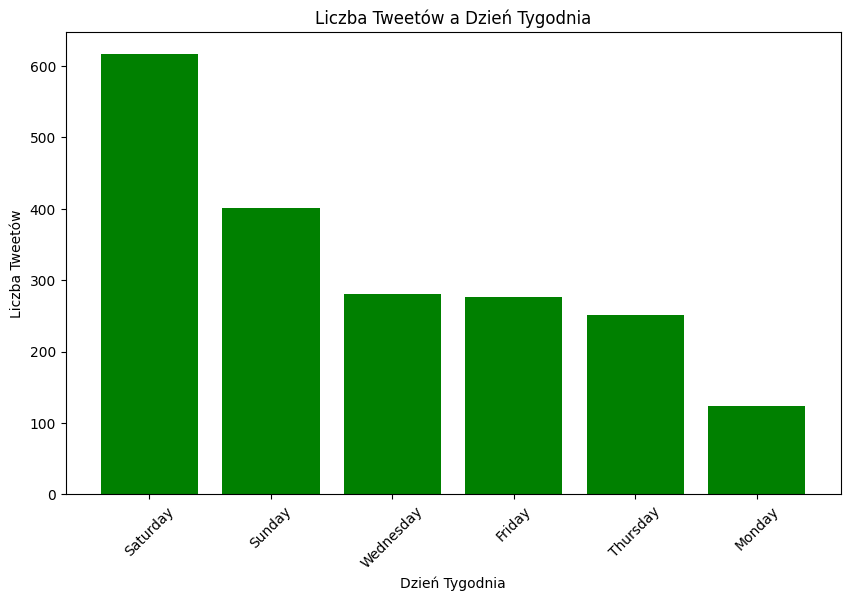

In [90]:
#4.1 Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia
df_dane["created_at"] = pd.to_datetime(df_dane["created_at"])
df_dane["weekday"] = df_dane["created_at"].dt.day_name()
liczba_tweets = df_dane["weekday"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(liczba_tweets.index, liczba_tweets.values, color='green')
plt.xlabel('Dzień Tygodnia')
plt.ylabel('Liczba Tweetów')
plt.title('Liczba Tweetów a Dzień Tygodnia')
plt.xticks(rotation=45)
plt.show()